In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Initial condition

In [64]:
m = 1.
k = 10.
zeta = 0.05
wn = np.sqrt(k/m)
wd = wn*np.sqrt(1.-zeta**2.)

v0 = 1./m
u0 = 0.

## Evaluate the impulse response
\begin{equation*}
h(t-\tau) = \frac{1}{m\omega_D}e^{-\zeta \omega_n (t-\tau)} \sin [\omega_D (t-\tau)], \quad\quad \text{ for } t\geq \tau
\end{equation*}

In [65]:
def impulseresponse(t,tau):
    "An impulse response function of a damped SDOF system"
    h = 1./(m*wd)*np.exp(-zeta*wn*(time-tau))*np.sin(wd*(time-tau)) # impulse response (time>=tau)
    h[np.where(time<tau)]=0 # zero response (time < tau)
    return h

dt = 0.01 # define the time step
N = 4096 # total number of points
time = dt*np.arange(N) # define the time array
tau = 5. # delay in time
h = impulseresponse(time, tau)

## Plot the impulse response

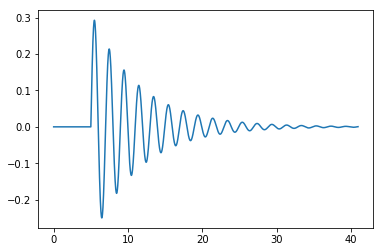

In [66]:
plt.plot(time, h)

## Define an arbitrary loading function

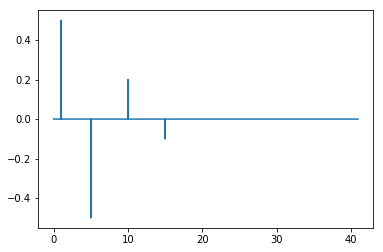

In [67]:
# Define a series of impulses
loading = np.zeros(N)
loading[np.where(time==1)] = 0.5
loading[np.where(time==5)] = -0.5
loading[np.where(time==10)] = 0.2
loading[np.where(time==15)] = -0.1

# Plot the loading fundtion
plt.plot(time, loading)

## Calculate the reponse to the arbitrary loading function by superposition
\begin{equation*}
du(t) = [p(\tau)d\tau] h(t-\tau), \quad\quad \text{for }t>\tau
\end{equation*}

\begin{equation*}
u(t) = (p*h)(t) =  \int_0^t p(\tau) h(t-\tau) d\tau
\end{equation*}


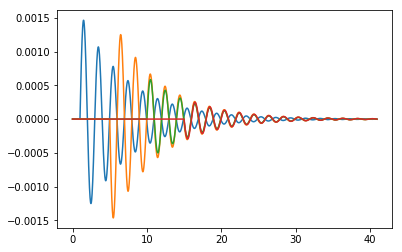

In [68]:
du1 = loading[np.where(time==1)]*dt * impulseresponse(time, tau=1.)
du5 = loading[np.where(time==5)]*dt * impulseresponse(time, tau=5.)
du10 = loading[np.where(time==10)]*dt * impulseresponse(time, tau=10.)
du15 = loading[np.where(time==15)]*dt * impulseresponse(time, tau=15.)

utotal = du1 + du5 + du10 + du15

plt.plot(time, du1)
plt.plot(time, du5)
plt.plot(time, du10)
plt.plot(time, du15)

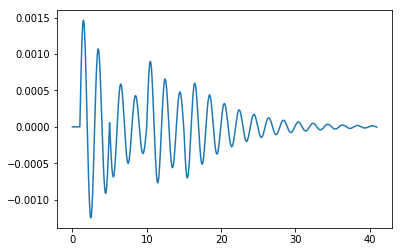

In [69]:
plt.plot(time, utotal)

## Compute the response to an arbitrary loading by "numpy.convolve()"

In [70]:
utotal_conv = np.convolve(loading, impulseresponse(time, 0.), 'full')

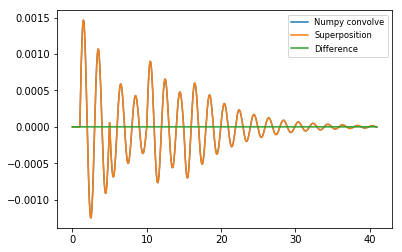

In [71]:
plt.plot(time, utotal_conv[0:N]*dt, label='Numpy convolve')
plt.plot(time, utotal, label='Superposition')
plt.plot(time, utotal-utotal_conv[0:N]*dt, label='Difference')
plt.legend()